In [84]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_excel('global_laptop_selling_data.xlsx')
df.head()

laptop_ID Company      Product   TypeName  Inches   
0          1   Apple  MacBook Pro  Ultrabook    13.3  \
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram   
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB  \
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight   
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg  \
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [86]:
df.shape

(1303, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [88]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [89]:
df.duplicated().sum()

0

In [90]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [91]:
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [92]:
df.corr(numeric_only = True)

laptop_ID    Inches  Price_euros
laptop_ID     1.000000 -0.087796     0.067830
Inches       -0.087796  1.000000     0.068197
Price_euros   0.067830  0.068197     1.000000

<Axes: >

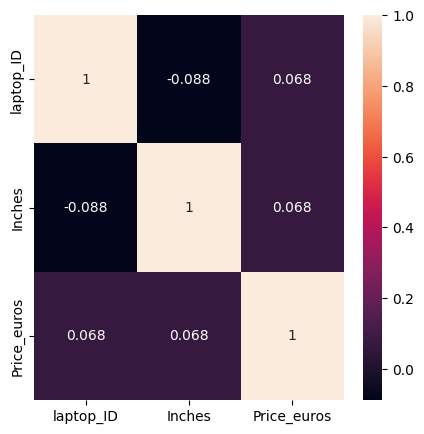

In [93]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only = True),annot=True)

<Axes: xlabel='Company', ylabel='count'>

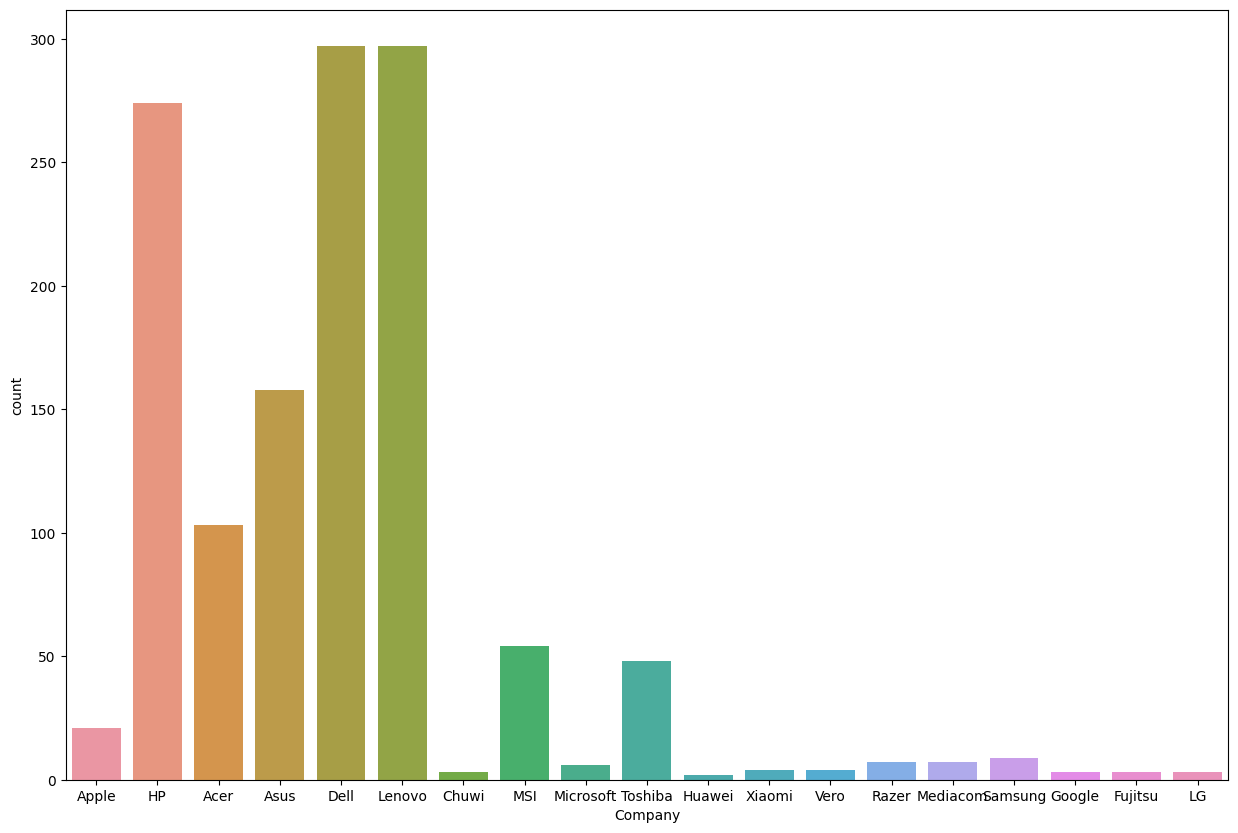

In [94]:
plt.figure(figsize=(15,10))
sns.countplot(x=df["Company"])

In [95]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

<Axes: xlabel='Price_euros', ylabel='Count'>

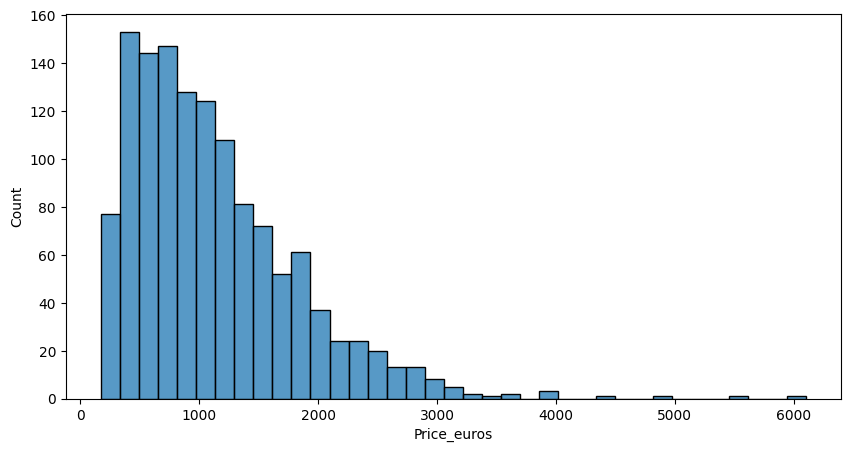

In [96]:
plt.figure(figsize = (10,5))
sns.histplot(df['Price_euros'])

# Label Encoding

In [97]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [98]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [99]:
df.head()

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu  Ram   
0          0        1      300         4    13.3                23   65    8  \
1          1        1      301         4    13.3                 1   63    8   
2          2        7       50         3    15.6                 8   74    8   
3          3        1      300         4    15.4                25   85    1   
4          4        1      300         4    13.3                23   67    8   

   Memory  Gpu  OpSys  Weight  Price_euros  
0       4   56      8      38      1339.69  
1       2   50      8      35       898.94  
2      16   52      4      74       575.00  
3      29    8      8      71      2537.45  
4      16   57      8      38      1803.60

In [100]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

# Measures of Central Tendency

In [101]:
df.Memory.mean()

16.34535686876439

In [102]:
df.Memory.median()

16.0

In [103]:
df

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu   
0             0        1      300         4    13.3                23   65  \
1             1        1      301         4    13.3                 1   63   
2             2        7       50         3    15.6                 8   74   
3             3        1      300         4    15.4                25   85   
4             4        1      300         4    13.3                23   67   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1298       10      580         0    14.0                13   89   
1299       1299       10      588         0    13.3                19   89   
1300       1300       10      196         3    14.0                 0   34   
1301       1301        7        2         3    15.6                 0   89   
1302       1302        2      568         3    15.6                 0   34   

      Ram  Memory  Gpu  OpSys  Weight  Price_euros  
0       8       4   56      8      38      1339.69  
1       8       2   50      8      35       898.94  
2       8      16   52      4      74       575.00  
3       1      29    8      8      71      2537.45  
4       8      16   57      8      38      1803.60  
...   ...     ...  ...    ...     ...          ...  
1298    5       4   46      5      78       638.00  
1299    1      29   46      5      41      1499.00  
1300    3      35   39      5      56       229.00  
1301    7      10   20      5     104       764.00  
1302    5      26   39      5     113       369.00  

[1303 rows x 13 columns]

In [104]:
x = df.drop(['Price_euros'],axis = 1)
y = df['Price_euros']

In [105]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=55)

# Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
li = LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression()

In [107]:
li_pred = li.predict(xtest)
li_pred

array([ 806.5979157 , 1884.43006122,  880.11916489,  612.13687108,
       1652.23504945, 1247.22298503, 1875.3263699 ,  266.47816   ,
       1324.40770812,  847.95900945, 1191.53136011, 1084.74350749,
       1928.04642298, 1967.98831458, 1799.03772123, 1100.94983712,
       1214.389043  , 1571.31592924,  755.14600679, 1144.83095871,
       1550.69095412,  997.69834669,  691.8648433 ,  739.98698067,
       1321.88028015,  948.75111229, 1370.36368484, 1783.78585052,
       1812.09985271,  761.44341862, 1029.01925431, 1212.30069342,
        797.86642222,  532.31656759, 1787.84879509,  792.06826065,
       1002.98186547, 1126.51177425, 1518.7007207 , 1633.97201056,
       1039.11961695, 1477.03910935, 1349.44991715, 1742.41339096,
       1638.42859085, 1138.56146072, 1350.92763944, 1801.64121657,
       1175.32996011, 1432.72909742, 1056.73356509,  662.04088269,
       1667.56605731, 1112.5382181 ,  916.00367759, 1146.92485762,
       1388.06622968, 1812.1370525 ,  256.26808573, 1460.38712

In [108]:
li_accuracy = li.score(xtest,ytest)
li_accuracy

0.49858680472341244

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
li_mse = mean_absolute_error(ytest,li_pred)
li_mse

368.7938131730208

In [110]:
li_mae = mean_squared_error(ytest,li_pred)
li_mae

231537.05787112738

In [111]:
li_data = pd.DataFrame({'Actual Result': ytest,'Predicted Result' : li_pred})
li_data

Actual Result  Predicted Result
62           599.00        806.597916
744         3299.00       1884.430061
752          579.00        880.119165
387         1369.00        612.136871
998         1799.00       1652.235049
...             ...               ...
1077        2499.00       1860.750575
26          1099.00        199.277406
565         1599.00       1014.236747
1244        1099.99       1364.039560
537          398.99       1470.559471

[391 rows x 2 columns]

# KNN

In [112]:
df1

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu   
0             0        1      300         4    13.3                23   65  \
1             1        1      301         4    13.3                 1   63   
2             2        7       50         3    15.6                 8   74   
3             3        1      300         4    15.4                25   85   
4             4        1      300         4    13.3                23   67   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1298       10      580         0    14.0                13   89   
1299       1299       10      588         0    13.3                19   89   
1300       1300       10      196         3    14.0                 0   34   
1301       1301        7        2         3    15.6                 0   89   
1302       1302        2      568         3    15.6                 0   34   

      Ram  Memory  Gpu  OpSys  Weight  Price_euros  
0       8       4   56      8      38      1339.69  
1       8       2   50      8      35       898.94  
2       8      16   52      4      74       575.00  
3       1      29    8      8      71      2537.45  
4       8      16   57      8      38      1803.60  
...   ...     ...  ...    ...     ...          ...  
1298    5       4   46      5      78       638.00  
1299    1      29   46      5      41      1499.00  
1300    3      35   39      5      56       229.00  
1301    7      10   20      5     104       764.00  
1302    5      26   39      5     113       369.00  

[1303 rows x 13 columns]

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [114]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [115]:
knn_pred = knn.predict(xtest)
knn_pred

array([ 621.38 , 1238.684, 1385.068, 1207.8  , 1518.58 , 1839.4  ,
        846.6  ,  410.6  ,  855.764,  842.086, 1421.   , 1113.332,
       1198.096, 1360.22 , 1118.82 , 1063.8  ,  914.832, 1254.1  ,
        763.49 ,  940.16 ,  933.58 , 1035.2  ,  473.534,  495.358,
        759.6  , 1219.4  , 1119.2  , 1294.612,  902.8  ,  857.94 ,
       1114.546,  683.978, 1427.4  ,  863.594, 1533.   ,  913.68 ,
       1072.65 , 1270.8  , 1339.6  , 2173.154, 1035.424,  953.632,
       1310.614, 2493.38 , 1823.742, 1342.884, 1205.802, 1847.4  ,
       1983.8  , 1304.2  ,  830.   ,  654.668, 1684.898, 1631.298,
        583.814, 1058.18 , 1282.198, 1593.126,  343.576, 1468.6  ,
       1506.934,  945.424, 1084.98 ,  986.598, 1754.6  , 1183.   ,
       1684.898, 1634.884, 1666.4  ,  362.714,  577.8  , 1526.4  ,
        835.104, 1338.198,  461.   ,  706.4  ,  582.224,  623.922,
        814.   ,  858.228,  805.48 ,  534.682,  738.854, 1493.4  ,
        517.07 ,  765.664, 1428.222, 1586.4  ,  514.398, 1719.

In [116]:
knn_accuracy = knn.score(xtest,ytest)
knn_accuracy

0.4125352034461639

In [117]:
knn_mse = mean_squared_error(ytest,knn_pred)
knn_mse

271273.0176993146

In [118]:
knn_mae = mean_absolute_error(ytest,knn_pred)
knn_mae

359.4666189258313

In [119]:
knn_data =pd.DataFrame({'Actual Result': ytest,'Predicted Result' : knn_pred})
knn_data.head()

Actual Result  Predicted Result
62           599.0           621.380
744         3299.0          1238.684
752          579.0          1385.068
387         1369.0          1207.800
998         1799.0          1518.580

# Decision Tree Regressor

In [120]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [121]:
dt_pred = dt.predict(xtest)
dt_pred 

array([ 619.  , 2419.  ,  521.86, 1046.44, 1749.  , 1090.  , 1799.  ,
        289.  , 1109.  , 1181.27, 1799.  ,  489.  , 1975.  , 1929.  ,
       1099.  ,  846.  ,  722.  , 1323.  ,  813.  ,  779.  , 1349.  ,
       1082.  ,  306.  ,  229.  ,  597.  ,  619.  , 1064.  , 1764.  ,
       1197.  ,  586.19, 1449.9 , 1299.  ,  910.  ,  719.  , 1999.  ,
        797.41, 1179.  , 2299.  , 2450.  , 2774.63,  779.  , 1299.  ,
       1299.  , 1673.  , 2824.  , 1345.  , 1323.  , 2999.  ,  805.99,
       1323.  , 1199.  ,  675.  , 1349.  ,  649.  ,  499.  , 1296.99,
       1149.  , 1935.  ,  439.  , 1813.  , 1629.  ,  979.  , 1537.39,
       2064.9 , 1468.  , 1475.  , 1200.  , 1757.42, 1757.42,  229.  ,
        749.  , 1499.  , 1048.  , 1757.42,  277.99,  399.  ,  959.  ,
        597.  ,  435.  ,  719.  ,  685.  ,  735.07,  970.9 , 1285.  ,
        750.  , 1279.  , 1168.  , 1999.  ,  469.  , 2639.  ,  359.  ,
       1749.  , 1149.  , 1009.  ,  949.  ,  485.  ,  579.  , 1499.  ,
       1350.  ,  749

In [122]:
dt_accuracy = dt.score(xtest,ytest)
dt_accuracy

0.6926212964943147

In [123]:
dt_mse = mean_squared_error(ytest,dt_pred)
dt_mse

141937.94924501277

In [124]:
dt_mae = mean_absolute_error(ytest,dt_pred)
dt_mae

236.11774936061383

In [125]:
dt_data =pd.DataFrame({'Actual Result': ytest,'Predicted Result' : dt_pred})
dt_data.head()

Actual Result  Predicted Result
62           599.0            619.00
744         3299.0           2419.00
752          579.0            521.86
387         1369.0           1046.44
998         1799.0           1749.00

# Random Forest 

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [127]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [128]:
rf_pred = rf.predict(xtest)

In [129]:
rf_pred

array([ 672.1766, 2379.5685,  751.4275, 1129.4381, 1656.9016, 1451.88  ,
       2522.6502,  292.0179, 1196.4079, 1039.8241, 1602.6121,  644.8641,
       2036.6109, 1860.182 , 1541.9851,  959.3437,  781.2392, 1342.3959,
        901.9507,  870.9977, 1383.9194, 1251.1383,  311.226 ,  261.686 ,
        642.2247,  831.3412, 1110.1677, 1807.5975, 1438.5806,  610.2622,
       1364.4639, 1327.6171,  937.103 ,  786.9641, 2105.6837,  915.6022,
       1155.1627, 1500.7469, 1880.919 , 3208.8828,  922.7545, 1054.3897,
       1114.1744, 1757.3338, 2127.1512, 1134.1819, 1567.9926, 2669.7419,
       1061.7621, 1389.3306,  828.2275,  743.063 , 1518.9833, 1231.6246,
        502.2353, 1428.0605, 1192.91  , 2100.292 ,  476.9148, 1507.878 ,
       1525.7194, 1088.5081, 1558.3797, 1988.6015, 1834.9888, 1441.0034,
       1238.0135, 1647.1515, 1773.9642,  236.786 ,  689.6372, 1647.1342,
       1048.6393, 1667.7335,  315.8494,  436.7777,  782.6833,  788.4128,
        597.6392,  920.9775, 1215.3548,  754.4511, 

In [130]:
rf_accuracy = rf.score(xtest,ytest)
rf_accuracy

0.849455859894129

In [131]:
rf_mse = mean_squared_error(ytest,rf_pred)
rf_mse

69516.61346013189

In [132]:
rf_mae = mean_absolute_error(ytest,rf_pred)
rf_mae

174.23760690537082

In [133]:
rf_data =pd.DataFrame({'Actual Result': ytest,'Predicted Result' : rf_pred})
rf_data.head()

Actual Result  Predicted Result
62           599.0          672.1766
744         3299.0         2379.5685
752          579.0          751.4275
387         1369.0         1129.4381
998         1799.0         1656.9016

In [134]:
data = {'Model': ['Linear Regression','KNN','Decision Tree Regressor','Random Forest'],
        'MAE':[li_mae,knn_mae,dt_mae,rf_mae],
        'MSE':[li_mse,knn_mse,dt_mae,rf_mse],
       'Accuracy':[li_accuracy,knn_accuracy,dt_accuracy,rf_accuracy]}
all_model_statistic = pd.DataFrame(data)
all_model_statistic

Model            MAE            MSE  Accuracy
0        Linear Regression  231537.057871     368.793813  0.498587
1                      KNN     359.466619  271273.017699  0.412535
2  Decision Tree Regressor     236.117749     236.117749  0.692621
3            Random Forest     174.237607   69516.613460  0.849456

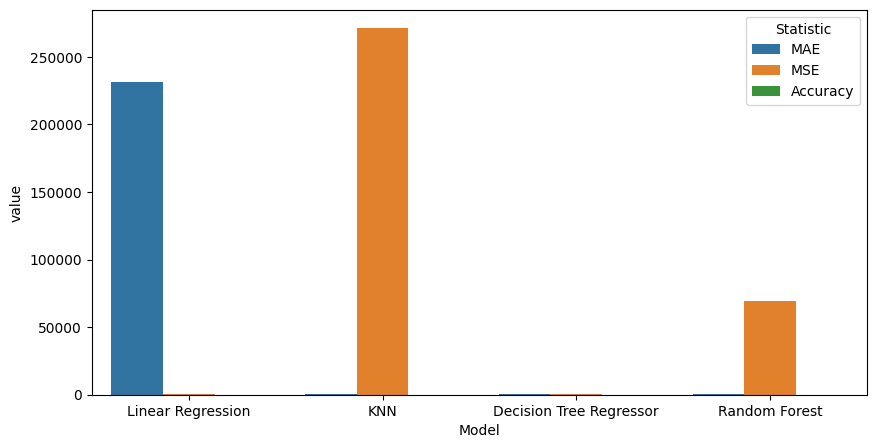

In [135]:
plt.figure(figsize = (10,5))
df2 = pd.melt(frame = all_model_statistic,id_vars ='Model',var_name = 'Statistic',value_name = 'value')
sns.barplot(data=df2,x='Model',y='value',hue = 'Statistic')
plt.show()

# Best Fit Line

# Linear Regression

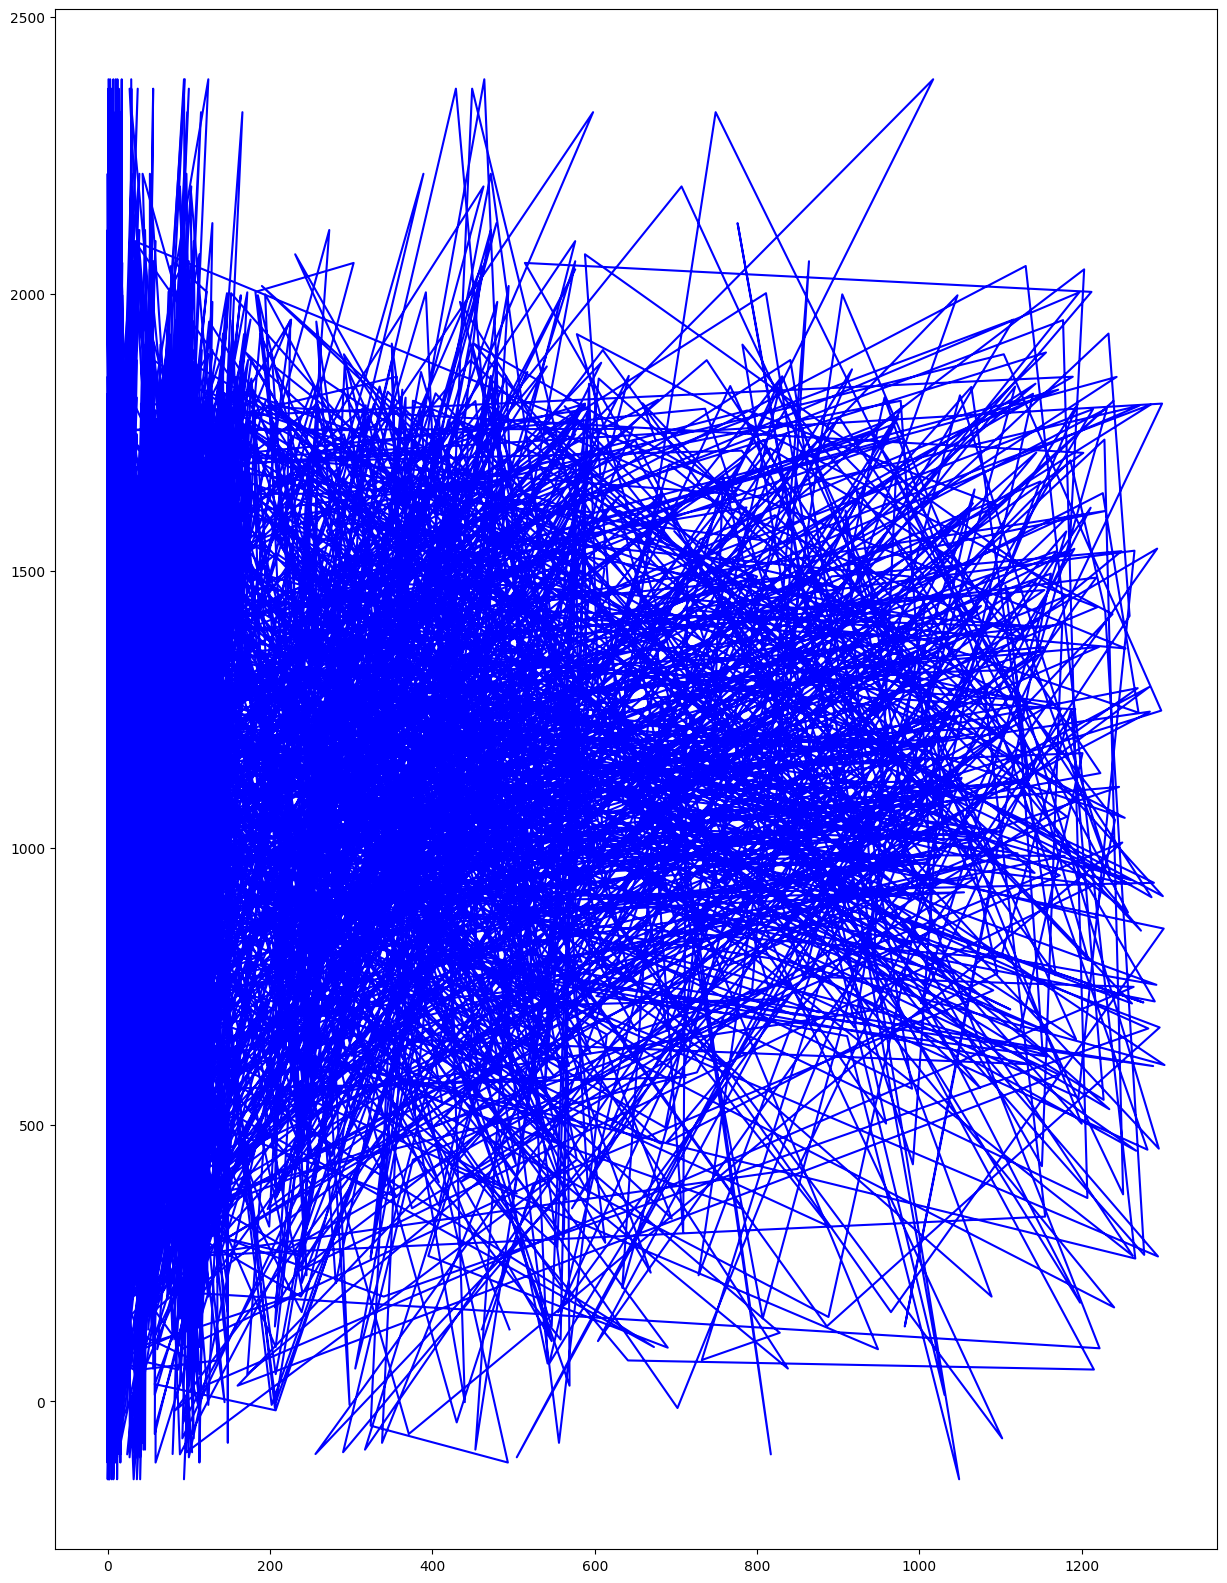

In [136]:
plt.figure(figsize = (15,20))
plt.plot(xtrain,li.predict(xtrain),color="blue")

# Model Save

In [137]:
import pickle as pk
import joblib as jb

In [138]:
pk.dump(rf,open("price","wb")) #Random Forest model save

In [139]:
rf2= pk.load(open("price","rb"))

In [140]:
model_pred = rf2.predict([[744,10,481,5,15.6,12,99,1,12,103,5,129]])
model_pred

array([2379.5685])

# Gradio Deployment

In [141]:
import gradio as gr

In [144]:
def rf_pred_price(Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight):
    predicted_result = rf.predict([[lCompany,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight]])
    return predicted_result

In [148]:
interface = gr.Interface(
  fn = rf_pred_price,
  inputs = ['number','number','number','number','number','number','number','number','number','number','number','number'],
  outputs = ['number'],
  title="Price Prediction"
).launch(share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app. 

Also please ensure that your antivirus or firewall is not blocking the binary file located at: C:\Users\rabey\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\frpc_windows_amd64_v0.2
